# 🚗 **AICE Associate 최종 실전 모의고사 1**


## **중고차 가격 예측**

**[비즈니스 시나리오]**

> 국내 중고차 플랫폼 **카셀**은 매년 50만 건 이상의 중고차 매물이 거래되는 대형 온라인 중고차 마켓이다.
하지만 소비자와 판매자 간의 가격 정보 비대칭이 커서,
소비자는 “적정 가격”이 얼마인지 알기 어렵고, 판매자는 너무 높은 가격으로 매물을 등록해 거래가 지연되기도 한다.
이에 따라 카셀 데이터팀은
실제 거래된 차량의 기본 정보와 정비·사고 이력 데이터를 분석하여,
**중고차의 적정 가격을 사전에 예측**할 수 있는 인공지능 모델을 구축하고자 한다.


**[데이터 설명: car_basic_info.csv]**

차량의 기본 제원 정보 (연식, 주행거리, 연료 등)
- car_id	차량 고유 식별자
- brand	제조사 브랜드 이름 (예: Hyundai, Kia, BMW 등)
- model	차량 모델명 (예: Avante, Sorento 등)
- year	출고 연도 (숫자형, 예: 2017, 2019 등)
- fuel_type	연료 종류 (범주형: Gasoline, Diesel 등)
- transmission	변속기 종류 (범주형: Automatic, Manual 등)
- engine_size	배기량 (리터 단위, 예: 1.6, 2.0 등)
- **price	차량 판매 가격 (단위: 만 원, 숫자형)** <---- 목표 변수

**[데이터 설명: car_history_info.csv]**

차량의 사고 이력, 옵션, 이전 소유자 수, 가격 등
- car_id	차량 고유 식별자
- mileage	누적 주행 거리 (단위: km)
- option_count	차량 장착 옵션 개수
- repair_count	정비 이력의 총 횟수
- repair_cost	누적 정비 비용 (단위: 만 원)
- last_repair_date	마지막 정비 일자

---

### **문제 1. 아래 지시사항에 따라 데이터를 불러오고 기본 정보를 확인하시오.**

**(1) 데이터 로드 및 병합**
- pandas 라이브러리를 별칭 `pd`를 사용하여 임포트하시오.
- `car_basic_info.csv`와 `car_history_info.csv` 두 파일을 각각 불러온 후, 'car_id' 컬럼을 기준으로 병합하여 변수 `df`에 저장하시오.
- 병합된 `df`의 컬럼별 결측치(missing value) 개수를 확인하여 출력하시오.

**(2) 문제 유형 판별**
- 예측할 대상(타겟 변수)은 자동차의 가격을 나타내는 'price' 컬럼입니다. 이 문제의 유형이 '회귀'와 '분류' 중 무엇인지 판단하여 `답안01` 변수에 문자열로 저장하시오. (예: `답안01 = '회귀'`)

In [30]:
# 여기에 코드를 작성하세요.

In [31]:
import pandas as pd

df_basic = pd.read_csv("car_basic_info.csv")
df_history = pd.read_csv("car_history_info.csv")
df = pd.merge(df_basic, df_history, on="car_id")
print(df.isnull().sum())

답안01='회귀'

car_id             0
year               0
mileage            0
fuel_type          0
brand              0
engine_size      228
transmission       0
accident_yn        0
option_count     188
prev_owners        0
repair_cost     1045
price              0
dtype: int64


### **문제 2.  기초 통계정보를 확인하여, 전체 중고차의 평균 가격을 알아봅니다.**

-   `df` 데이터프레임의 `price` 컬럼에 대한 **평균(mean)** 값을 계산
-   계산된 평균 가격에서 소수점은 버리고 **정수 부분만** `답안02` 변수에 저장

In [32]:
# 여기에 코드를 작성하세요.

In [33]:
# 'price' 컬럼의 평균 계산
average_price = df['price'].mean()

# 결과를 정수형으로 변환하여 답안 변수에 저장
답안02 = int(average_price)

답안02

1971

### **문제 3. 아래 지시사항에 따라 데이터를 시각화하고 결과를 분석하시오.**

**(1) 브랜드별 평균 가격 시각화**
- `seaborn` 라이브러리를 `sns` 별칭으로 임포트하시오.
- `matplotlib.pyplot` 라이브러리를 `plt` 별칭으로 임포트하시오.
- `sns.barplot()`을 사용하여 `brand`에 따른 `price`의 평균을 막대그래프로 시각화하시오.


**(2) 시각적 분석 및 해석**
- 위에서 생성한 막대그래프를 시각적으로 분석하여, 평균 가격이 가장 높은 브랜드 이름을 `답안03` 변수에 문자열로 저장하시오.

In [34]:
# 여기에 코드를 작성하세요.

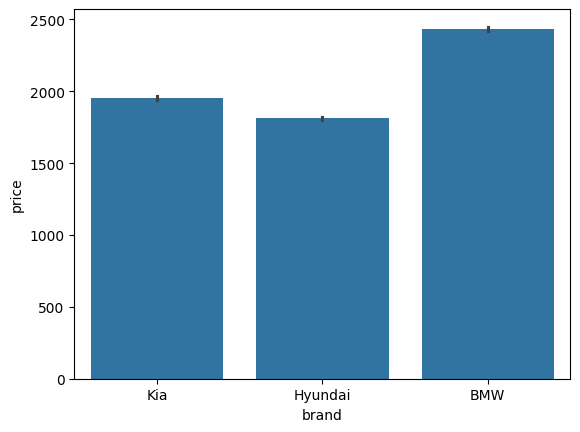

In [35]:
import seaborn as sns
sns.barplot(data=df, x='brand', y='price')
답안03='BMW'

### **문제 4.아래 지시사항에 따라 특정 조건의 데이터를 추출하고 분석하시오.**

- 'Kia' 자동차 중 사고 이력이 있는(accident_yn == 1) 차량 데이터를 추출하시오.
- 추출된 데이터의 **수리 비용(repair_cost)의 평균값**을 계산하여 답안04 변수에 저장하시오. (소수점은 무시하고 정수 부분만 저장)

In [36]:
# 여기에 코드를 작성하세요.

In [37]:
cond1 = (df['brand']=='Kia')&(df['accident_yn']==1)
df_04 = df[cond1]
df_04['repair_cost'].mean()
답안04 = int(df_04['repair_cost'].mean())


### **문제 5. 아래 지시사항에 따라 결측치를 처리하시오.**


-   **'engine_size' 컬럼:** 해당 컬럼의 **중앙값(median)**으로 결측치를 채우시오.
-   **'repair_cost', 'option_count' 컬럼:** 두 컬럼의 결측치는 모두 **0**으로 채우시오.
-   **'prev_owners' 컬럼:** 이 컬럼에 결측치가 있는 **행(row) 전체를 삭제**하시오.


모든 변경사항은 원본 `df`에 반영되어야 합니다.

In [38]:
# 여기에 코드를 작성하세요.

In [39]:
df['engine_size'] = df['engine_size'].fillna(df['engine_size'].median())
df[['repair_cost','option_count']] = df[['repair_cost','option_count']].fillna(0)
df = df.dropna(subset=['prev_owners'])

### **문제 6. 차량 연식('year')을 이용하여 새로운 파생변수 'car_age'를 생성하시오.**


-   **(1) 'car_age' 컬럼 생성:**
    -   **기준 연도를 2025년**으로 설정합니다.
    -   `car_age`는 `2025 - year` 공식으로 계산하여 새로운 컬럼으로 추가합니다.

-   **(2) 기존 'year' 컬럼 삭제:**
    -   'car_age'를 만들었으므로, 정보가 중복되는 기존 'year' 컬럼은 데이터프레임에서 완전히 삭제합니다.

In [40]:
# 여기에 코드를 작성하세요.

In [41]:
# 파생변수 생성
df['car_age'] = 2025 - df['year']
df = df.drop('year', axis=1)

### **문제 7. 아래 지시사항에 따라 데이터를 인코딩하고 최종 데이터셋을 준비하시오.**


**(1) 원-핫 인코딩**
- `df` 데이터프레임의 범주형 컬럼인 **'fuel_type', 'brand', 'transmission'**에 대해 원-핫 인코딩을 수행하고, 그 결과를 `df_encoded` 변수에 저장하시오.

**(2) 피처(X)와 타겟(y) 분리**
- 위에서 생성한 `df_encoded`를 사용하여 다음과 같이 데이터를 분리하시오.
  - **타겟(y):** 'price' 컬럼을 `y` 변수에 저장
  - **피처(X):** 'price'와 불필요한 'car_id' 컬럼을 제외한 나머지 모든 컬럼을 `X` 변수에 저장

In [42]:
# 여기에 코드를 작성하세요.

In [43]:
df_encoded = pd.get_dummies(df,columns=['fuel_type', 'brand', 'transmission'])

X = df_encoded.drop(columns=['price', 'car_id'],axis=1)
y = df_encoded['price']


### **문제 8. 아래 지시사항에 따라 데이터셋을 분할하고 스케일링하시오.**

**(1) 데이터셋 분할**
-   `sklearn.model_selection` 라이브러리에서 `train_test_split` 함수를 임포트하시오.
-   앞서 준비한 `X`와 `y` 데이터를 사용하여 **훈련 데이터와 테스트 데이터를 7:3 비율**로 분할하시오.
-   분할 시, 재현성을 위해 `random_state`는 `42`로 설정하시오.
-   분할된 데이터는 각각 `X_train`, `X_test`, `y_train`, `y_test` 변수에 저장하시오.

**(2) 피처 스케일링**
-   `sklearn.preprocessing` 라이브러리에서 `StandardScaler`를 임포트하시오.
-   `StandardScaler` 객체를 생성하여 `scaler` 변수에 저장하시오.
-   **훈련 데이터(`X_train`)**를 기준으로 `scaler`를 학습(`fit`)시키고 동시에 변환(`transform`)하여, 그 결과를 `X_train_scaled`에 저장하시오.
-   **테스트 데이터(`X_test`)**에는 학습된 `scaler`를 그대로 사용하여 변환(`transform`)만 수행하고, 그 결과를 `X_test_scaled`에 저장하시오.

In [44]:
# 여기에 코드를 작성하세요.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
X_train_scaled.shape

(4900, 15)

### **문제 9. 아래 지시사항에 따라 3가지 머신러닝 모델을 생성하고 학습시키시오.**


**(1) 모델 생성**
-   `LinearRegression` 모델을 생성하여 `lr` 변수에 저장하시오.
-   `RandomForestRegressor` 모델을 생성하여 `rf` 변수에 저장하시오. (재현성을 위해 `random_state=42`로 설정)
-   `XGBRegressor` 모델을 생성하여 `xgb` 변수에 저장하시오. (재현성을 위해 `random_state=42`로 설정)

**(2) 모델 학습**
-   위에서 생성한 세 가지 모델(`lr`, `rf`, `xgb`) 각각을 학습시키시오.

In [46]:
# 여기에 코드를 작성하세요.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 모델 생성
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# 모델 학습
lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### **문제 10. 아래 지시사항에 따라 학습된 모델들의 성능을 비교하고 최적 모델을 선정하시오.**

**(1) 모델 성능 평가**
-   `sklearn.metrics` 라이브러리에서 `mean_squared_error` 함수를 임포트하시오.
-   `numpy` 라이브러리를 `np` 별칭으로 임포트하시오.
-   학습된 세 모델 각각에 대해 검증 데이터로 예측을 수행하고, 그 결과를 `y_pred_lr`, `y_pred_rf`, `y_pred_xgb` 변수에 저장하시오.
-   각 모델의 예측값을 사용하여 RMSE를 계산하고, 그 결과를 `rmse_lr`, `rmse_rf`, `rmse_xgb` 변수에 저장하시오.
    -   (힌트: RMSE = `np.sqrt(mean_squared_error(실제값, 예측값))`)

**(2) 최적 모델 선정**
-   계산된 세 개의 RMSE 값을 비교하여, 최적 모델의 **이름**을 `답안10_1` 변수에 문자열로 저장하시오.
    -   (모델 이름은 `LinearRegression`, `RandomForestRegressor`, `XGBRegressor` 중 하나여야 합니다.)
-   해당 최적 모델의 **RMSE 값**을 `답안10_2` 변수에 저장하시오.

In [48]:
# 여기에 코드를 작성하세요.

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 예측
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)

# RMSE 계산
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(rmse_lr,rmse_rf,rmse_xgb)

답안10_1 = "LinearRegression"
답안10_2 = rmse_lr

148.4639654124931 161.728500809521 166.85013859748514


### **문제 11.아래 지시사항에 따라 딥러닝 모델을 설계하시오.**

- tensorflow.keras를 사용하여 다음 순차 모델을 dl_model 변수에 저장하시오.


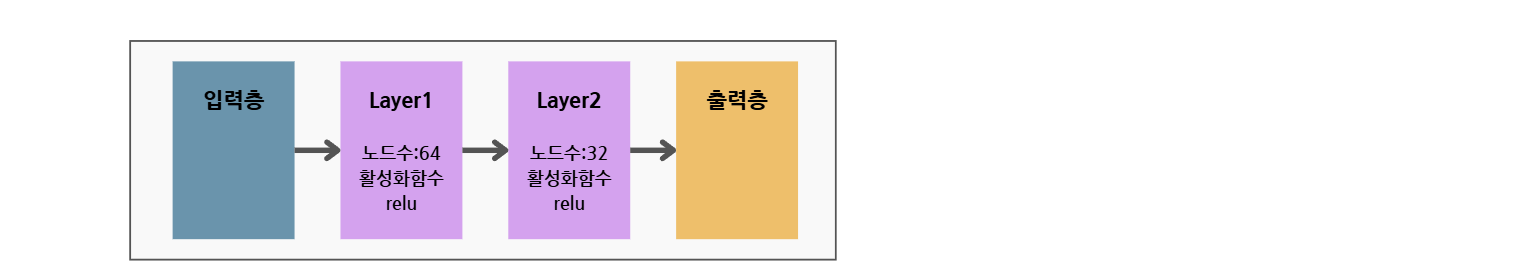

In [50]:
# 여기에 코드를 작성하세요.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(100)

In [51]:
dl_model = Sequential()
dl_model.add(Dense(units=64, activation='relu',input_shape=[X_train_scaled.shape[1]]))
dl_model.add(Dense(units=32, activation='relu'))
dl_model.add(Dense(units=1, activation='linear'))

dl_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

### **문제 12. 아래 지시사항에 따라 Callback을 설정하고 모델을 학습시키시오.**

**(1) Callback 설정**
-   `tensorflow.keras.callbacks`에서 `EarlyStopping`과 `ModelCheckpoint`를 임포트하시오.
-   **조기 종료 (EarlyStopping):** 검증 손실(`val_loss`)이 **5 에포크(epoch)** 동안 개선되지 않으면 학습을 조기 종료하도록 설정하고, `early_stopping` 변수에 저장하시오.
-   **최적 모델 저장 (ModelCheckpoint):** 학습 과정 중 검증 손실(`val_loss`)이 가장 낮은 최적의 모델을 **'best_model.keras'** 파일로 저장하도록 설정하고, `model_checkpoint` 변수에 저장하시오.

**(2) 모델 컴파일**
-   앞서 생성한 `dl_model`에 대해, `optimizer`는 `'adam'`, `loss`는 `'mean_squared_error'`로 설정하여 컴파일하시오.

**(3) 모델 학습**
-   `dl_model`을 다음 조건에 맞게 학습시키고, 학습 과정의 기록은 `history` 변수에 저장하시오.
    -   `epochs`: 50
    -   `batch_size`: 32
    -   `validation_data`: 검증용 데이터 사용
    -   `callbacks`: 위에서 설정한 `early_stopping`과 `model_checkpoint`를 모두 적용

In [52]:
# 여기에 코드를 작성하세요.

In [53]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

dl_model.compile(optimizer='adam', loss='mean_squared_error')

history = dl_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3995758.7500 - val_loss: 3790378.7500
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3545673.5000 - val_loss: 2438168.0000
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1929860.1250 - val_loss: 661673.1250
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 440038.6562 - val_loss: 145445.7031
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115717.6016 - val_loss: 79882.5469
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 71830.7812 - val_loss: 60201.8828
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55379.8477 - val_loss: 50005.0078
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46557.7695 - val_loss: 44112.4844
Epoch 9/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 41511.2734 - val_loss: 40448.7266
Epoch 10/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38363.7812 - val_loss: 37960.0664
Epoch 11/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4

---

### **문제 13. 아래 지시사항에 따라 딥러닝 모델의 학습 과정을 시각화하시오.**

-   `matplotlib.pyplot` 라이브러리를 `plt` 별칭으로 임포트하시오.
-   `history.history` 딕셔너리에 저장된 'loss'(훈련 손실)와 'val_loss'(검증 손실)를 하나의 그래프에 선 그래프로 그리시오.
    -   훈련 손실의 라벨은 'Training Loss'로 지정하시오.
    -   검증 손실의 라벨은 'Validation Loss'로 지정하시오.
-   그래프의 제목은 'Model Loss Over Epochs'로 설정하시오.
-   그래프의 x축 이름은 'Epoch', y축 이름은 'Loss (MSE)'로 설정하시오.
-   각 선이 무엇을 의미하는지 알 수 있도록 범례를 표시하고, 그래프를 화면에 출력하시오.

In [54]:
# 여기에 코드를 작성하세요.

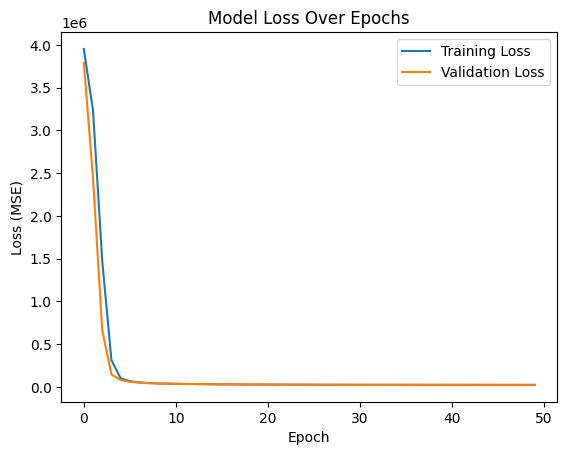

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

---

### **문제 14. 아래 지시사항에 따라 새로운 데이터의 가격을 예측하시오.**

- 이전에 저장한 최고 성능의 딥러닝 모델(`best_model.keras`)을 불러와, 새로 입고된 중고차 한 대의 가격을 예측합니다.

- 예측된 가격은 `답안14` 변수에 저장하시오.


In [56]:
#새로 입고된 중고차 정보
sample_data=[[-0.54, -0.53, 1.53, 2.79, 0.29, 17.8, -1.51, -0.68, 0.85, -0.35, -0.49, -1.01, 1.52, 0.5, -0.5]]

In [57]:
# 여기에 코드를 작성하세요.

In [58]:
from tensorflow.keras.models import load_model

# 가격 예측
loaded_model = load_model('best_model.keras')

prediction = loaded_model.predict(np.array(sample_data))
답안14 = prediction[0][0]

print(f"새로 입고된 중고차 예측 가격: {답안14:.2f} 만원")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
새로 입고된 중고차 예측 가격: 4302.98 만원


In [59]:
X_train_scaled.shape

(4900, 15)